In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

pd.options.display.max_rows = 25

FILE = r'pickles/with_weekdays.pickle'

with open(FILE, 'rb') as read_file:
    df = pickle.load(read_file)

df.head()

# df = pd.read_csv(FILE)

# df.rename(columns={'EXITS                                                               ': 'EXITS'}, inplace=True)
# df.drop('Unnamed: 0', axis=1, inplace = True)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY_NUM,WEEKDAY
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,00:00:00,REGULAR,6625470,2245312,2018-05-19 00:00:00,5,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,04:00:00,REGULAR,6625494,2245314,2018-05-19 04:00:00,5,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,08:00:00,REGULAR,6625514,2245338,2018-05-19 08:00:00,5,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,12:00:00,REGULAR,6625595,2245415,2018-05-19 12:00:00,5,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/19/2018,16:00:00,REGULAR,6625791,2245481,2018-05-19 16:00:00,5,Saturday


In [47]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True, \
                          ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATETIME"], inplace=True)

In [48]:
df = df.sort_values(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'WEEKDAY', 'TIME'])
df[['PREV_TIME','PREV_ENTRIES','PREV_EXITS']] = (df.groupby(['C/A','UNIT','SCP','STATION'])['TIME','ENTRIES','EXITS'].transform(lambda x: x.shift(1)))

df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY_NUM,WEEKDAY,PREV_TIME,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829,2018-04-28 00:00:00,5,Saturday,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830,2018-04-28 04:00:00,5,Saturday,00:00:00,6598847.0,2235829.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863,2018-04-28 08:00:00,5,Saturday,04:00:00,6598864.0,2235830.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955,2018-04-28 12:00:00,5,Saturday,08:00:00,6598880.0,2235863.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015,2018-04-28 16:00:00,5,Saturday,12:00:00,6598961.0,2235955.0


In [49]:
def get_entry_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        return 0
    return counter

def get_exit_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        return 0
    return counter

df["ENTRY_COUNTS"] = df.apply(get_entry_counts, axis=1, max_counter=1000000) 
df["EXIT_COUNTS"] = df.apply(get_exit_counts, axis=1, max_counter=1000000)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,WEEKDAY_NUM,WEEKDAY,PREV_TIME,PREV_ENTRIES,PREV_EXITS,ENTRY_COUNTS,EXIT_COUNTS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829,2018-04-28 00:00:00,5,Saturday,NaN,NaN,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830,2018-04-28 04:00:00,5,Saturday,00:00:00,6598847.0,2235829.0,17.0,1.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863,2018-04-28 08:00:00,5,Saturday,04:00:00,6598864.0,2235830.0,16.0,33.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955,2018-04-28 12:00:00,5,Saturday,08:00:00,6598880.0,2235863.0,81.0,92.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015,2018-04-28 16:00:00,5,Saturday,12:00:00,6598961.0,2235955.0,214.0,60.0


In [ ]:
# deltas = df.groupby(['C/A', 'UNIT', 'SCP', 'STATION']).diff(axis=1)
# deltas.head()

# df['entry delta'] = deltas['ENTRIES']
# df['exit delta'] = deltas['EXITS']

# # drop outliers
# df = df[df['entry delta'] > -1]
# df = df[df['entry delta'] < 50000]
# df = df[df['exit delta'] > -1]
# df = df[df['exit delta'] < 50000]

# df_deltas = df.groupby(['STATION', 'DATE', 'TIME'])[['entry delta', 'exit delta']].sum()

In [50]:
len(df)

788761

In [51]:
len(df[df['ENTRY_COUNTS'] == 0])

117669

In [52]:
# most trafficked station over the time period
dfstat = df.groupby('STATION').sum()

# identify the top 10 trafficked station by entries
top10entries = dfstat.sort_values('ENTRY_COUNTS', ascending=False)[['ENTRY_COUNTS']].head(10).reset_index()
top10entries

,STATION,ENTRY_COUNTS
0,JOURNAL SQUARE,11498439.0
1,34 ST-PENN STA,4617927.0
2,GRD CNTRL-42 ST,3622486.0
3,34 ST-HERALD SQ,3386126.0
4,23 ST,2928513.0
5,14 ST-UNION SQ,2706239.0
6,42 ST-PORT AUTH,2591378.0
7,TIMES SQ-42 ST,2587514.0
8,FULTON ST,2372369.0
9,86 ST,2154551.0


In [39]:
top10exits = dfstat.sort_values('EXIT_COUNTS', ascending=False)[['EXIT_COUNTS']].head(10).reset_index()
top10exits

,STATION,EXIT_COUNTS
0,JOURNAL SQUARE,10231148.0
1,NEWARK HM HE,4822184.0
2,34 ST-PENN STA,4325626.0
3,GRD CNTRL-42 ST,4006305.0
4,34 ST-HERALD SQ,3091825.0
5,TIMES SQ-42 ST,3031571.0
6,14 ST-UNION SQ,2696090.0
7,23 ST,2112241.0
8,42 ST-PORT AUTH,1963053.0
9,FULTON ST,1936641.0


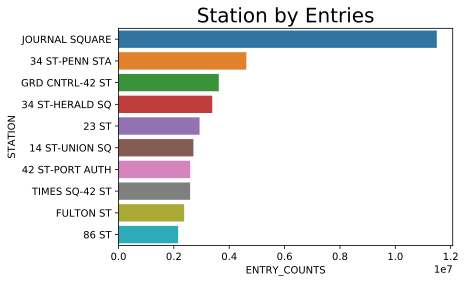

In [40]:
import seaborn as sns

sns.barplot(y = 'STATION', x = 'ENTRY_COUNTS', data=top10entries, orient='h');
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='x');
plt.title('Station by Entries', fontdict={'fontsize': 20});

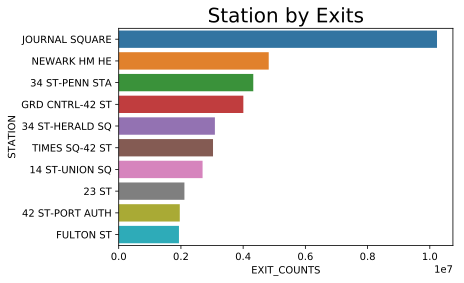

In [41]:
sns.barplot(y = 'STATION', x = 'EXIT_COUNTS', data=top10exits, orient='h');
plt.ticklabel_format(style='sci', scilimits=(0,0), axis='x');
plt.title('Station by Exits', fontdict={'fontsize': 20});

## What is up with New Jersey?

In [57]:
jsq = df[df['STATION'] == 'JOURNAL SQUARE']
jsq.groupby('DATE')[['ENTRY_COUNTS', 'EXIT_COUNTS']].sum().sort_values('ENTRY_COUNTS', ascending=False)

,ENTRY_COUNTS,EXIT_COUNTS
DATE,,
05/21/2018,3465070.0,3018282.0
05/25/2018,1771061.0,1544494.0
05/22/2018,1749006.0,1525880.0
05/18/2018,1747833.0,1536734.0
05/19/2018,1726176.0,1505710.0
05/23/2018,263190.0,100913.0
05/11/2018,188767.0,346824.0
05/04/2018,117119.0,176726.0
05/24/2018,41119.0,50997.0


In [59]:
# pickle df

with open('pickles/may_2018_with_counts.pickle', 'wb') as to_write:
    pickle.dump(df, to_write)
